# **Shiuli Subhra Ghosh (MDS202035) and Suman Roy (MDS202041)**




## Importing Packagaes/Modules

In [ ]:
!pip install scikit-optimize
from skopt.space import Integer
from skopt.space import Real
from skopt.space import Categorical
from skopt.utils import use_named_args
from skopt import gp_minimize

import matplotlib.pyplot as plt



# standart data tools
import numpy as np
import pandas as pd

# common visualizing tools
import matplotlib.pyplot as plt
import seaborn as sns

# CNN layers and the Deep Learning model
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense , Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# splitting tool for the validation set
from sklearn.model_selection import train_test_split

# to block unnecesarry warnings for updates etc.
import warnings
warnings.filterwarnings("ignore")

     |████████████████████████████████| 100 kB 4.1 MB/s 


## Importing the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
X = np.load('/content/drive/MyDrive/Dataset/X.npy')
Y= np.load('/content/drive/MyDrive/Dataset/Y.npy')

Mounted at /content/drive


In [ ]:
print(" Max value of X: ",X.max())
print(" Min value of X: ",X.min())
print(" Shape of X: ",X.shape)

print("\n Max value of Y: ",Y.max())
print(" Min value of Y: ",Y.min())
print(" Shape of Y: ",Y.shape)

 Max value of X:  1.0
 Min value of X:  0.003921569
 Shape of X:  (2062, 64, 64)

 Max value of Y:  1.0
 Min value of Y:  0.0
 Shape of Y:  (2062, 10)


## Train Test Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
x_train = x_train.reshape(-1,64,64,1)
x_test = x_test.reshape(-1,64,64,1)
print(" Shape of X_test: ",x_test.shape)
print(" Shape of X_train: ",x_train.shape)
print(" Shape of y_test: ",y_test.shape)
print(" Shape of y_train: ",y_train.shape)

 Shape of X_test:  (413, 64, 64, 1)
 Shape of X_train:  (1649, 64, 64, 1)
 Shape of y_test:  (413, 10)
 Shape of y_train:  (1649, 10)


## Defining the Search Space

In [ ]:

filters_1 = Integer(name='filters_1',low=16, high=64)
kernel_1= Integer(name='kernel_1',low=1, high=6)
filters_2 = Integer(name='filters_2',low=16, high=64)
kernel_2= Integer(name='kernel_2',low=1, high=6)
pool_1=Integer(name='pool_1',low=2,high=4)


filters_3 = Integer(name='filters_3',low=16, high=64)
kernel_3= Integer(name='kernel_3',low=1, high=6)
filters_4 = Integer(name='filters_4',low=16, high=64)
kernel_4= Integer(name='kernel_4',low=1, high=6)
pool_2=Integer(name='pool_2',low=2,high=4)
dropout_1=Real(name='dropout_1',low=0.1,high=0.4)

filters_5 = Integer(name='filters_5',low=16, high=64)
kernel_5= Integer(name='kernel_5',low=1, high=6)
filters_6 = Integer(name='filters_6',low=16, high=64)
kernel_6= Integer(name='kernel_6',low=1, high=6)
pool_3=Integer(name='pool_3',low=2,high=4)
dropout_2=Real(name='dropout_2',low=0.1,high=0.4)

filters_7 = Integer(name='filters_7',low=16, high=64)
kernel_7= Integer(name='kernel_7',low=1, high=6)
pool_4=Integer(name='pool_4',low=2,high=4)
dropout_3=Real(name='dropout_3',low=0.1,high=0.4)

dense_1=Integer(name='dense_1',low=16,high=128)
dense_2=Integer(name='dense_2',low=16,high=128)
dense_3=Integer(name='dense_3',low=16,high=128)

## Initializing Default Parameters

In [ ]:
dimensions=[filters_1,kernel_1,filters_2,kernel_2,pool_1,filters_3,kernel_3,filters_4,kernel_4,pool_2,dropout_1,filters_5,kernel_5,filters_6,kernel_6,pool_3,dropout_2,filters_7,kernel_7,pool_4,dropout_3,dense_1,dense_2,dense_3]
default_parameters=[16,5,32,5,2,32,4,32,4,2,0.2,32,3,64,3,2,0.2,32,2,2,0.2,128,64,40]

## Designing the Objective Function

In [ ]:
def get_model(filters_1,kernel_1,filters_2,kernel_2,pool_1,filters_3,kernel_3,filters_4,kernel_4,pool_2,dropout_1,filters_5,kernel_5,filters_6,kernel_6,pool_3,dropout_2,filters_7,kernel_7,pool_4,dropout_3,dense_1,dense_2,dense_3):
  CNN_model = Sequential()
  CNN_model.add(Conv2D(filters=filters_1,kernel_size=(kernel_1,kernel_1),activation="relu",padding="same",input_shape=(64,64,1)))
  CNN_model.add(Conv2D(filters=filters_2,kernel_size=(kernel_2,kernel_2),activation="relu",padding="same"))
  CNN_model.add(MaxPooling2D(pool_size=(pool_1,pool_1),padding="same")) 

  CNN_model.add(Conv2D(filters=filters_3,kernel_size=(kernel_3,kernel_3),activation="relu",padding="same"))
  CNN_model.add(Conv2D(filters=filters_4,kernel_size=(kernel_4,kernel_4),activation="relu",padding="same"))
  CNN_model.add(MaxPooling2D(pool_size=(pool_2,pool_2),padding="same"))

  CNN_model.add(Dropout(dropout_1))

  CNN_model.add(Conv2D(filters=filters_5,kernel_size=(kernel_5,kernel_5),activation="relu",padding="same"))
  CNN_model.add(Conv2D(filters=filters_6,kernel_size=(kernel_6,kernel_6),activation="relu",padding="same"))
  CNN_model.add(MaxPooling2D(pool_size=(pool_3,pool_3),padding="same"))

  CNN_model.add(Dropout(dropout_2))

  CNN_model.add(Conv2D(filters=filters_7,kernel_size=(kernel_7,kernel_7),activation="relu",padding="same"))
  CNN_model.add(MaxPooling2D(pool_size=(pool_4,pool_4),padding="same"))

  CNN_model.add(Dropout(dropout_3))
  CNN_model.add(Flatten())

  CNN_model.add(Dense(dense_1,activation="relu"))
  CNN_model.add(Dense(dense_2,activation="relu"))
  CNN_model.add(Dense(dense_3,activation="relu"))

  CNN_model.add(Dense(10,activation="softmax"))

  CNN_model.compile(optimizer=Adam(lr=0.0002),loss=keras.losses.categorical_crossentropy,metrics=["accuracy"])
  return CNN_model

In [ ]:
from tensorflow.keras import backend as K

best_accuracy = 0.0

validation_data=(x_test,y_test)

@use_named_args(dimensions=dimensions)
def fitness(filters_1,kernel_1,filters_2,kernel_2,pool_1,filters_3,kernel_3,filters_4,kernel_4,pool_2,dropout_1,filters_5,kernel_5,filters_6,kernel_6,pool_3,dropout_2,filters_7,kernel_7,pool_4,dropout_3,dense_1,dense_2,dense_3):
  model = get_model(filters_1,kernel_1,filters_2,kernel_2,pool_1,filters_3,kernel_3,filters_4,kernel_4,pool_2,dropout_1,filters_5,kernel_5,filters_6,kernel_6,pool_3,dropout_2,filters_7,kernel_7,pool_4,dropout_3,dense_1,dense_2,dense_3)
   
  # Use Keras to train the model.
  history = model.fit(x= x_train,
                      y= y_train,
                      epochs=30,
                      batch_size=128,
                      validation_data=validation_data)

  # Get the classification accuracy on the validation-set
  # after the last training-epoch.
  accuracy = history.history['val_accuracy'][-1]

  # Print the classification accuracy.
  print()
  print("Accuracy: {0:.2%}".format(accuracy))
  print()

    # Save the model if it improves on the best-found performance.
    # We use the global keyword so we update the variable outside
    # of this function.
  global best_accuracy

    # If the classification accuracy of the saved model is improved ...
  if accuracy > best_accuracy:
      # Save the new model to harddisk.
     # model.save(path_best_model)
        
        # Update the classification accuracy.
      best_accuracy = accuracy

    # Delete the Keras model with these hyper-parameters from memory.
  del model
    
    # Clear the Keras session, otherwise it will keep adding new
    # models to the same TensorFlow graph each time we create
    # a model with a different set of hyper-parameters.
  K.clear_session()
    
    # NOTE: Scikit-optimize does minimization so it tries to
    # find a set of hyper-parameters with the LOWEST fitness-value.
    # Because we are interested in the HIGHEST classification
    # accuracy, we need to negate this number so it can be minimized.
  return -accuracy
# This function exactly comes from :Hvass-Labs, TensorFlow-Tutorials



## Performing Bayesian Optimization 

In [ ]:
%%time
search_result = gp_minimize(func=fitness,
                            dimensions=dimensions,
                            acq_func='EI', # Expected Improvement.
                            n_calls=50,
                            x0=default_parameters)

Epoch 1/30
13/13 [==============================] - 15s 185ms/step - loss: 2.3037 - accuracy: 0.0940 - val_loss: 2.3025 - val_accuracy: 0.0872
Epoch 2/30
13/13 [==============================] - 1s 94ms/step - loss: 2.3027 - accuracy: 0.1122 - val_loss: 2.3024 - val_accuracy: 0.0847
Epoch 3/30
13/13 [==============================] - 1s 98ms/step - loss: 2.3022 - accuracy: 0.1176 - val_loss: 2.3019 - val_accuracy: 0.0896
Epoch 4/30
13/13 [==============================] - 1s 94ms/step - loss: 2.3018 - accuracy: 0.1086 - val_loss: 2.3009 - val_accuracy: 0.1114
Epoch 5/30
13/13 [==============================] - 1s 95ms/step - loss: 2.3000 - accuracy: 0.1352 - val_loss: 2.2971 - val_accuracy: 0.2058
Epoch 6/30
13/13 [==============================] - 1s 100ms/step - loss: 2.2952 - accuracy: 0.1498 - val_loss: 2.2827 - val_accuracy: 0.2010
Epoch 7/30
13/13 [==============================] - 1s 93ms/step - loss: 2.2767 - accuracy: 0.1552 - val_loss: 2.2080 - val_accuracy: 0.1961
Epoch 8/30

## Accuracy

### Best Accuracy stored as the global variable

In [ ]:
print("Best Accuracy=",100*best_accuracy," %")

Best Accuracy= 95.15738487243652  %


### Best accuracy obtained from the gp-minimize process

In [ ]:
print("Best Accuracy=",100*(-search_result.fun)," %")

Best Accuracy= 95.15738487243652  %


## Optimized Paramteres of the CNN using Bayesian Optimization

In [ ]:
filters_1_opt,kernel_1_opt,filters_2_opt,kernel_2_opt,pool_1_opt,filters_3_opt,kernel_3_opt,filters_4_opt,kernel_4_opt,pool_2_opt,dropout_1_opt,filters_5_opt,kernel_5_opt,filters_6_opt,kernel_6_opt,pool_3_opt,dropout_2_opt,filters_7_opt,kernel_7_opt,pool_4_opt,dropout_3_opt,dense_1_opt,dense_2_opt,dense_3_opt=tuple(search_result.x)

## Optimization Progress Visualisation

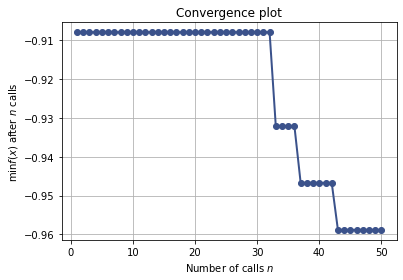

In [ ]:
from skopt.plots import plot_convergence
plot_convergence(search_result) 

## Optimal Neural Network Architecture

In [ ]:
CNN_model_opt = Sequential()
CNN_model_opt.add(Conv2D(filters=filters_1_opt,kernel_size=(kernel_1_opt,kernel_1_opt),activation="relu",padding="same",input_shape=(64,64,1)))
CNN_model_opt.add(Conv2D(filters=filters_2_opt,kernel_size=(kernel_2_opt,kernel_2_opt),activation="relu",padding="same"))
CNN_model_opt.add(MaxPooling2D(pool_size=(pool_1_opt,pool_1_opt),padding="same")) 

CNN_model_opt.add(Conv2D(filters=filters_3_opt,kernel_size=(kernel_3_opt,kernel_3_opt),activation="relu",padding="same"))
CNN_model_opt.add(Conv2D(filters=filters_4_opt,kernel_size=(kernel_4_opt,kernel_4_opt),activation="relu",padding="same"))
CNN_model_opt.add(MaxPooling2D(pool_size=(pool_2_opt,pool_2_opt),padding="same"))

CNN_model_opt.add(Dropout(dropout_1_opt))

CNN_model_opt.add(Conv2D(filters=filters_5_opt,kernel_size=(kernel_5_opt,kernel_5_opt),activation="relu",padding="same"))
CNN_model_opt.add(Conv2D(filters=filters_6_opt,kernel_size=(kernel_6_opt,kernel_6_opt),activation="relu",padding="same"))
CNN_model_opt.add(MaxPooling2D(pool_size=(pool_3_opt,pool_3_opt),padding="same"))

CNN_model_opt.add(Dropout(dropout_2_opt))

CNN_model_opt.add(Conv2D(filters=filters_7_opt,kernel_size=(kernel_7_opt,kernel_7_opt),activation="relu",padding="same"))
CNN_model_opt.add(MaxPooling2D(pool_size=(pool_4_opt,pool_4_opt),padding="same"))

CNN_model_opt.add(Dropout(dropout_3_opt))
CNN_model_opt.add(Flatten())

CNN_model_opt.add(Dense(dense_1_opt,activation="relu"))
CNN_model_opt.add(Dense(dense_2_opt,activation="relu"))
CNN_model_opt.add(Dense(dense_3_opt,activation="relu"))

CNN_model_opt.add(Dense(10,activation="softmax"))

CNN_model_opt.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 64, 64, 16)        80        
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 34)        19618     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 34)       0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 24)        13080     
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 61)        52765     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 61)       0         
 2D)                                                  

## Compilation and Training

In [ ]:
CNN_model_opt.compile(optimizer=Adam(lr=0.0002),loss=keras.losses.categorical_crossentropy,metrics=["accuracy"])
results = CNN_model_opt.fit(x_train,y_train,epochs=70,validation_data=(x_test,y_test))

Epoch 1/70
52/52 [==============================] - 5s 65ms/step - loss: 2.3037 - accuracy: 0.0928 - val_loss: 2.3029 - val_accuracy: 0.0993
Epoch 2/70
52/52 [==============================] - 2s 46ms/step - loss: 2.3028 - accuracy: 0.1013 - val_loss: 2.3030 - val_accuracy: 0.0847
Epoch 3/70
52/52 [==============================] - 2s 46ms/step - loss: 2.3024 - accuracy: 0.1025 - val_loss: 2.3032 - val_accuracy: 0.0847
Epoch 4/70
52/52 [==============================] - 2s 45ms/step - loss: 2.3012 - accuracy: 0.1043 - val_loss: 2.2965 - val_accuracy: 0.1332
Epoch 5/70
52/52 [==============================] - 2s 45ms/step - loss: 2.0735 - accuracy: 0.2317 - val_loss: 1.6190 - val_accuracy: 0.5182
Epoch 6/70
52/52 [==============================] - 2s 45ms/step - loss: 1.4365 - accuracy: 0.4815 - val_loss: 1.1060 - val_accuracy: 0.6199
Epoch 7/70
52/52 [==============================] - 2s 45ms/step - loss: 1.0915 - accuracy: 0.6246 - val_loss: 0.6843 - val_accuracy: 0.8039
Epoch 8/70
52

## Plotting the Result

In [ ]:
print("Accuracy=",results.history["val_accuracy"][-1])

Accuracy= 0.990314781665802


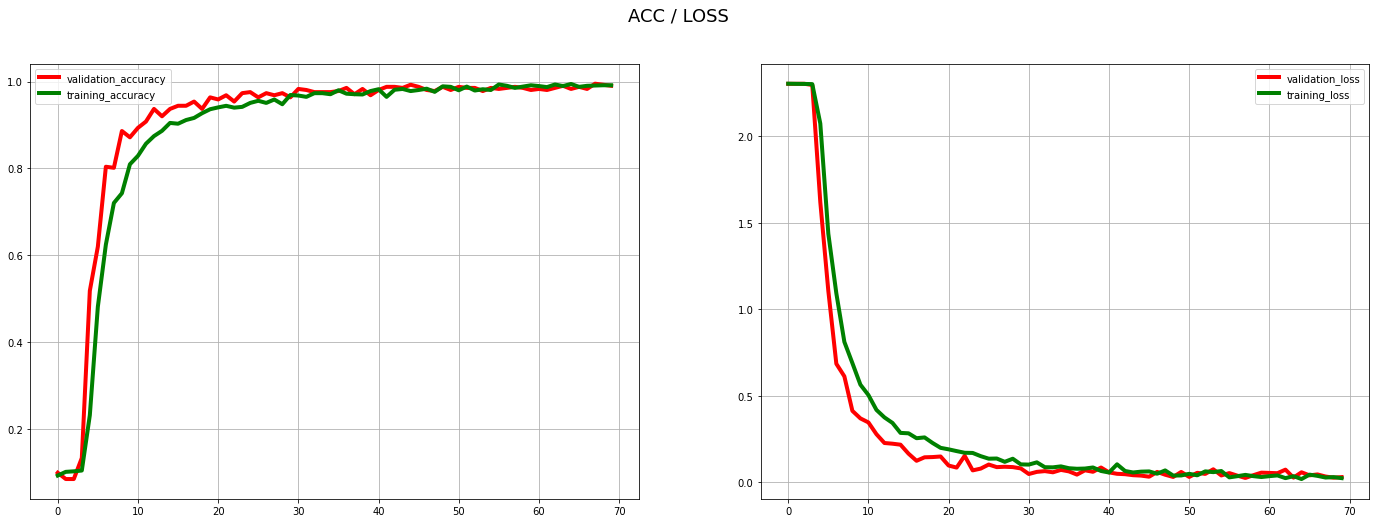

In [ ]:
plt.figure(figsize=(24,8))

plt.subplot(1,2,1)
plt.plot(results.history["val_accuracy"],label="validation_accuracy",c="red",linewidth=4)
plt.plot(results.history["accuracy"],label="training_accuracy",c="green",linewidth=4)
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(results.history["val_loss"],label="validation_loss",c="red",linewidth=4)
plt.plot(results.history["loss"],label="training_loss",c="green",linewidth=4)
plt.legend()
plt.grid(True)

plt.suptitle("ACC / LOSS",fontsize=18)

plt.show()